In [ ]:
!pip install tensorflow

     ------------------------------------ 272.8/272.8 MB 644.0 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 911.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 422.5/422.5 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 1.6 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     -------------------------------------- 65.5/65.5 kB 876.9 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 613.5 kB/s eta 0:

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from sklearn.model_selection import train_test_split
from keras.models import Model

In [ ]:
df = pd.read_csv('tourism_with_id.csv')

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
dataset = pd.read_csv('tourism_rating.csv')
dataset

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
training, validation = train_test_split(dataset, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
training

,User_Id,Place_Id,Place_Ratings
9254,278,262,3
1561,49,251,2
1670,52,52,2
6087,183,385,1
6669,200,258,5
...,...,...,...
5734,173,402,5
5191,157,85,4
5390,163,18,3
860,28,416,4


In [ ]:
validation

,User_Id,Place_Id,Place_Ratings
6252,188,207,3
4684,142,268,2
1731,54,103,3
4742,144,119,3
4521,138,288,5
...,...,...,...
6412,193,47,2
8285,249,292,1
7853,236,336,4
1095,34,176,4


In [ ]:
n_users = len(dataset.User_Id.unique())
print(n_users)

300


In [ ]:
n_tourist = len(dataset.Place_Id.unique())
print(n_tourist)

437


In [ ]:
# creating book embedding path
dataset_input = Input(shape=[1], name="Dataset-Input")
dataset_embedding = Embedding(n_tourist+1, 5, name="Dataset-Embedding")(dataset_input)
dataset_vec = Flatten(name="Flatten-Tourism")(dataset_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([dataset_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
fc3 = Dense(32, activation='relu')(fc2)
out = Dense(1)(fc3)

# Create model and compile it
model = Model([user_input, dataset_input], out)
model.compile('adam', 'mean_squared_error')

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Dataset-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Dataset-Embedding (Embedding)  (None, 1, 5)         2190        ['Dataset-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         1505        ['User-Input[0][0]']             
                                                                                            

In [ ]:
history = model.fit([training.User_Id, training.Place_Id], training.Place_Ratings, epochs=55, verbose=1)

Epoch 1/55
250/250 [==============================] - 4s 4ms/step - loss: 2.8545
Epoch 2/55
250/250 [==============================] - 1s 4ms/step - loss: 1.8733
Epoch 3/55
250/250 [==============================] - 1s 4ms/step - loss: 1.8222
Epoch 4/55
250/250 [==============================] - 1s 4ms/step - loss: 1.7877
Epoch 5/55
250/250 [==============================] - 1s 4ms/step - loss: 1.7840
Epoch 6/55
250/250 [==============================] - 1s 4ms/step - loss: 1.7759
Epoch 7/55
250/250 [==============================] - 1s 4ms/step - loss: 1.7623
Epoch 8/55
250/250 [==============================] - 1s 4ms/step - loss: 1.7610
Epoch 9/55
250/250 [==============================] - 1s 4ms/step - loss: 1.7448
Epoch 10/55
250/250 [==============================] - 1s 3ms/step - loss: 1.7250
Epoch 11/55
250/250 [==============================] - 1s 3ms/step - loss: 1.6698
Epoch 12/55
250/250 [==============================] - 1s 3ms/step - loss: 1.6140
Epoch 13/55
250/250 [====

Text(0, 0.5, 'Training Error')

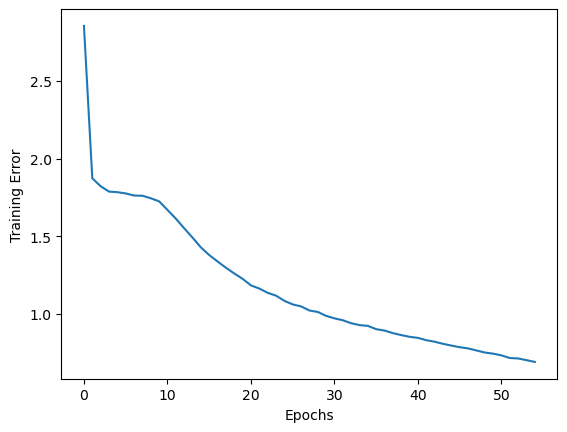

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model.evaluate([validation.User_Id, validation.Place_Id], validation.Place_Ratings)

63/63 [==============================] - 1s 3ms/step - loss: 3.2376


3.2376396656036377

In [ ]:
model.save('rating_recommendation_model.h5')

In [ ]:
tourism_data = np.array(list(set(dataset.Place_Id)))
print(tourism_data[:10])

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
user = np.array([4 for i in range(len(tourism_data))])
print(user[:10])

[4 4 4 4 4 4 4 4 4 4]


In [ ]:
prediction = model.predict([user, tourism_data])
prediction = np.array([a[0] for a in prediction])
recommended_tourist_ids = (-prediction).argsort()[:10]
print(recommended_tourist_ids)
print(prediction[recommended_tourist_ids])

14/14 [==============================] - 0s 3ms/step
[434 127  61 285  18 137 253 284 260 152]
[5.9265237 5.8770003 5.623223  5.6115084 5.5536027 5.4526205 5.3470044
 5.341248  5.3301263 5.3012953]


In [ ]:
df[df['Place_Id'].isin(recommended_tourist_ids)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
17,18,Museum Bank Indonesia,Museum Bank Indonesia adalah sebuah museum di ...,Budaya,Jakarta,2000,4.7,NaN,"{'lat': -6.137127, 'lng': 106.813005}",-6.137127,106.813005,NaN,18
60,61,Tugu Proklamasi,Tugu Proklamasi adalah tugu peringatan proklam...,Budaya,Jakarta,0,4.6,NaN,"{'lat': -6.2030468, 'lng': 106.8466623}",-6.203047,106.846662,NaN,61
126,127,Blue Lagoon Jogja,Blue Lagoon adalah salah satu wisata air Jogja...,Taman Hiburan,Yogyakarta,10000,4.3,NaN,"{'lat': -7.7044358, 'lng': 110.45026}",-7.704436,110.450260,NaN,127
136,137,Wisata Alam Kalibiru,Kalibiru sebenarnya adalah sebuah nama hutan y...,Cagar Alam,Yogyakarta,20000,4.4,90.0,"{'lat': -7.8057305, 'lng': 110.127969}",-7.805731,110.127969,NaN,137
151,152,Pantai Patihan,"Pantai ini terletak di daerah Srigading, Sande...",Bahari,Yogyakarta,5000,4.1,45.0,"{'lat': -7.997777999999999, 'lng': 110.2449113}",-7.997778,110.244911,NaN,152
252,253,Selasar Sunaryo Art Space,Selasar Sunaryo Art Space (SSAS) adalah sebuah...,Taman Hiburan,Bandung,25000,4.6,NaN,"{'lat': -6.8585406, 'lng': 107.6365486}",-6.858541,107.636549,NaN,253
259,260,Museum Pos Indonesia,Museum Pos Indonesia telah ada sejak masa Hind...,Budaya,Bandung,0,4.5,NaN,"{'lat': -6.902012999999998, 'lng': 107.6197787}",-6.902013,107.619779,NaN,260
283,284,Pasar Baru,Pasar Baru adalah kawasan perdagangan yang ber...,Pusat Perbelanjaan,Bandung,0,4.3,NaN,"{'lat': -6.9177044, 'lng': 107.6036014}",-6.917704,107.603601,NaN,284
284,285,Taman Sejarah Bandung,Taman Sejarah Bandung adalah taman yang terlet...,Budaya,Bandung,0,4.6,45.0,"{'lat': -6.9103086, 'lng': 107.6098619}",-6.910309,107.609862,NaN,285
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
